In [1]:
from fealpy.pde.beam_model import PlanarBeam

from fealpy.functionspace import LagrangeFESpace

from fealpy.fem import BilinearForm
from fealpy.fem import EulerBernoulliBeamStructureIntegrator
from fealpy.fem import DirichletBC

from scipy.sparse.linalg import spsolve

import matplotlib.pyplot as plt
import numpy as np

node:
 [[0.   0.96]
 [1.44 0.96]
 [0.   0.  ]
 [1.44 0.  ]]
NN: 4
cell:
 [[0 1]
 [2 0]
 [3 1]]
NC: 3


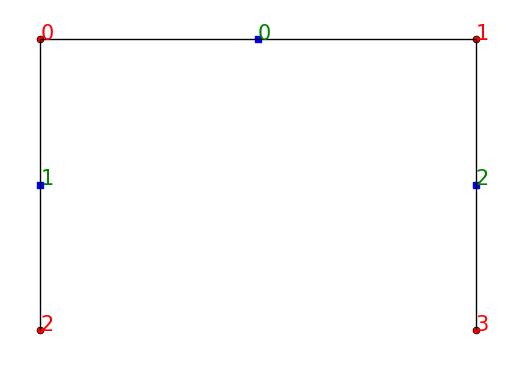

In [2]:
pde = PlanarBeam()

mesh = pde.init_mesh()
node = mesh.entity('node')
NN = mesh.number_of_nodes()
cell = mesh.entity('cell')
NC = mesh.number_of_cells()
print("node:\n", node)
print("NN:", NN)
print("cell:\n", cell)
print("NC:", NC)

fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes, showindex=True, fontsize=15, fontcolor='r')
mesh.find_cell(axes, showindex=True, fontsize=15, fontcolor='g')
plt.show()

In [3]:
GD = mesh.geo_dimension()
print("GD:", GD)

space = LagrangeFESpace(mesh, p=1, spacetype='C', doforder='vdims')
print("space:", space)

gdof = space.number_of_global_dofs()
ldof = space.number_of_local_dofs()
print("gdof:", gdof)
print("ldof:", ldof)

uh = space.function(dim=3) 
print("uh:(gdof, 3)\n", uh)
print(uh.shape)

GD: 2
space: Lagrange finite element space on linear mesh!
gdof: 4
ldof: 2
uh:(gdof, 3)
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(4, 3)


In [4]:
vspace = 3*(space, ) # 把标量空间张成向量空间
print("space:", vspace)

bform = BilinearForm(vspace)
print("bform:", bform)

space: (<fealpy.functionspace.lagrange_fe_space.LagrangeFESpace object at 0x7fe3062f2320>, <fealpy.functionspace.lagrange_fe_space.LagrangeFESpace object at 0x7fe3062f2320>, <fealpy.functionspace.lagrange_fe_space.LagrangeFESpace object at 0x7fe3062f2320>)
bform: <fealpy.fem.bilinear_form.BilinearForm object at 0x7fe396e2b670>


In [5]:
E0 = pde.E # 杨氏模量
I0 = pde.I # 惯性矩
A0 = pde.A # 截面面积

print("全局坐标系下的三个单元刚度矩阵 k1,k2,k3 如下:\n", 
      EulerBernoulliBeamStructureIntegrator(E0, I0, A0).assembly_cell_matrix(vspace))

全局坐标系下的三个单元刚度矩阵 k1,k2,k3 如下:
 [[[ 1.41666667e+08  0.00000000e+00  0.00000000e+00 -1.41666667e+08
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  7.83661265e+05  5.64236111e+05  0.00000000e+00
   -7.83661265e+05  5.64236111e+05]
  [ 0.00000000e+00  5.64236111e+05  5.41666667e+05  0.00000000e+00
   -5.64236111e+05  2.70833333e+05]
  [-1.41666667e+08  0.00000000e+00  0.00000000e+00  1.41666667e+08
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -7.83661265e+05 -5.64236111e+05  0.00000000e+00
    7.83661265e+05 -5.64236111e+05]
  [ 0.00000000e+00  5.64236111e+05  2.70833333e+05  0.00000000e+00
   -5.64236111e+05  5.41666667e+05]]

 [[ 2.64485677e+06  0.00000000e+00 -1.26953125e+06 -2.64485677e+06
    0.00000000e+00 -1.26953125e+06]
  [ 0.00000000e+00  2.12500000e+08  0.00000000e+00  0.00000000e+00
   -2.12500000e+08  0.00000000e+00]
  [-1.26953125e+06  0.00000000e+00  8.12500000e+05  1.26953125e+06
    0.00000000e+00  4.06250000e+05]
  [-2.64485677e+06  0.00000000e+00  1.269

In [6]:
bform.add_domain_integrator(EulerBernoulliBeamStructureIntegrator(E0, I0, A0))
K = bform.assembly() # 基函数由标量函数组合而成的向量函数空间

print("全局刚度矩阵 KK(12, 12):\n", K.toarray())

全局刚度矩阵 KK(12, 12):
 [[ 1.44311523e+08  0.00000000e+00  1.26953125e+06 -1.41666667e+08
   0.00000000e+00  0.00000000e+00 -2.64485677e+06  0.00000000e+00
   1.26953125e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.13283661e+08  5.64236111e+05  0.00000000e+00
  -7.83661265e+05  5.64236111e+05  0.00000000e+00 -2.12500000e+08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.26953125e+06  5.64236111e+05  1.35416667e+06  0.00000000e+00
  -5.64236111e+05  2.70833333e+05 -1.26953125e+06  0.00000000e+00
   4.06250000e+05  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.41666667e+08  0.00000000e+00  0.00000000e+00  1.44311523e+08
   0.00000000e+00  1.26953125e+06  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.64485677e+06  0.00000000e+00  1.26953125e+06]
 [ 0.00000000e+00 -7.83661265e+05 -5.64236111e+05  0.00000000e+00
   2.13283661e+08 -5.64236111e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.12500000e+08  0

In [7]:
 # 加载力的条件 
F = np.zeros((uh.shape[0], 3), dtype=np.float64)
print("F:(gdof 3)\n", F)

idx, f = mesh.meshdata['force_bc'] 
print("idx:", idx)
print("f:", f)
print("F[idx]\n:", F[idx])
F[idx] = f # (10, 3)
print("F[idx]\n:", F[idx])
print("F\n:", F)

F:(gdof 3)
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
idx: [0 1]
f: [[ 3000. -3000.  -720.]
 [    0. -3000.   720.]]
F[idx]
: [[0. 0. 0.]
 [0. 0. 0.]]
F[idx]
: [[ 3000. -3000.  -720.]
 [    0. -3000.   720.]]
F
: [[ 3000. -3000.  -720.]
 [    0. -3000.   720.]
 [    0.     0.     0.]
 [    0.     0.     0.]]


In [8]:
idx, disp = mesh.meshdata['disp_bc']
print("idx:", idx)
print("disp:", disp)
bc = DirichletBC(vspace, disp, threshold=idx)

idx: [2 3]
disp: [0. 0. 0.]


In [9]:
# 按分量处理自由度索引
idx1 = np.array([6, 7, 8, 9, 10, 11])
print("idx1:", idx1)
A, F = bc.apply(K, F.flat, uh, dflag=idx1)
print("A:(GD*gdof, GD*gdof)\n", np.round(A.toarray(), decimals=2))
print("F:(GD*gdof)\n", F)

idx1: [ 6  7  8  9 10 11]
A:(GD*gdof, GD*gdof)
 [[ 1.44311523e+08  0.00000000e+00  1.26953125e+06 -1.41666667e+08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.13283661e+08  5.64236110e+05  0.00000000e+00
  -7.83661270e+05  5.64236110e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.26953125e+06  5.64236110e+05  1.35416667e+06  0.00000000e+00
  -5.64236110e+05  2.70833330e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.41666667e+08  0.00000000e+00  0.00000000e+00  1.44311523e+08
   0.00000000e+00  1.26953125e+06  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.83661270e+05 -5.64236110e+05  0.00000000e+00
   2.13283661e+08 -5.64236110e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.000

In [10]:
uh.flat[:] = spsolve(A, F)
print("uh:", uh)

uh: [[ 9.17664838e-04 -1.03584864e-05 -1.38736970e-03]
 [ 9.01188011e-04 -1.78768077e-05 -3.88301468e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
